In [100]:
import ast
import math
import os

import geopandas as gpd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [101]:
# creating folder to save the output
output_dir = "../analytics/output"
os.makedirs(output_dir, exist_ok=True)

In [102]:
# creating EXCEL output file
excel_file_general_stat = "../analytics/output/clear_cuts_stats_2017_2024.xlsx"

# Load Dataset


In [103]:
# Clear cuts (all clear cuts)
sufosat: gpd.GeoDataFrame = gpd.read_file(
    "../analytics/data/local_folder/sufosat_clusters_enriched.fgb"
)
sufosat

,clear_cut_group,date_min,date_max,days_delta,clear_cut_group_size,concave_hull_score,area_ha,cities,natura2000_area_ha,natura2000_codes,slope_area_ha,geometry
0,0,2018-12-07,2019-02-17,72,13,1.000000,0.520004,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1219789.689 6054526.697, 12197..."
1,1,2019-12-01,2019-12-31,30,6,0.928574,0.520004,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1221859.689 6054536.697, 12218..."
2,239744,2021-02-05,2021-02-05,0,1,1.000000,0.060001,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1221739.689 6054546.697, 12217..."
3,2,2023-06-07,2023-12-05,181,13,1.000000,0.920005,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1221159.688 6055586.697, 12211..."
4,3,2021-01-13,2023-03-15,791,137,0.640423,11.550035,['2A041'],0.000000,None,0.011783,"MULTIPOLYGON (((1219859.689 6055366.697, 12198..."
...,...,...,...,...,...,...,...,...,...,...,...,...
255653,239739,2020-03-13,2021-05-30,443,19,0.605461,1.220009,['64545'],0.000000,None,0.007184,"MULTIPOLYGON (((315009.689 6262906.697, 315009..."
255654,239741,2019-03-25,2021-03-31,737,62,1.000000,4.690016,['64545'],0.000000,None,0.271278,"MULTIPOLYGON (((315369.688 6261636.697, 315369..."
255655,239740,2024-05-03,2024-07-26,84,13,1.000000,1.100006,['64545'],0.000000,None,0.857699,"MULTIPOLYGON (((315689.689 6262016.697, 315689..."
255656,239742,2020-05-12,2021-07-12,426,13,0.748861,0.820007,['64260'],0.820007,['FR7200775'],0.000000,"MULTIPOLYGON (((314999.689 6264926.697, 314999..."


In [104]:
# departments
departments: gpd.GeoDataFrame = gpd.read_file(
    "../analytics/data/cadastre/cadastre_france_departments.fgb"
)
departments

,code_insee,name,geometry
0,2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774..."
1,2B,Haute-Corse,"MULTIPOLYGON (((1159416.005 6158689.756, 11594..."
2,83,Var,"MULTIPOLYGON (((914567.676 6279020.989, 914575..."
3,34,Hérault,"MULTIPOLYGON (((662645.732 6249747.417, 662666..."
4,13,Bouches-du-Rhône,"MULTIPOLYGON (((799594.601 6263150.832, 799602..."
...,...,...,...
92,31,Haute-Garonne,"MULTIPOLYGON (((491715.551 6229117.37, 492178...."
93,81,Tarn,"MULTIPOLYGON (((582445.189 6318934.642, 582462..."
94,11,Aude,"MULTIPOLYGON (((593491.217 6242495.488, 593597..."
95,09,Ariège,"MULTIPOLYGON (((522392.652 6204087.047, 522457..."


In [105]:
# Getting 2 first caracters of cities code to merge with departments
sufosat["cities_str"] = sufosat["cities"].apply(
    lambda x: ast.literal_eval(x)[0] if isinstance(x, str) and x.startswith("[") else x
)

sufosat["cities_str"] = sufosat["cities_str"].astype(str)
sufosat["dpt_code"] = sufosat["cities_str"].str[:2]
sufosat

,clear_cut_group,date_min,date_max,days_delta,clear_cut_group_size,concave_hull_score,area_ha,cities,natura2000_area_ha,natura2000_codes,slope_area_ha,geometry,cities_str,dpt_code
0,0,2018-12-07,2019-02-17,72,13,1.000000,0.520004,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1219789.689 6054526.697, 12197...",2A041,2A
1,1,2019-12-01,2019-12-31,30,6,0.928574,0.520004,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1221859.689 6054536.697, 12218...",2A041,2A
2,239744,2021-02-05,2021-02-05,0,1,1.000000,0.060001,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1221739.689 6054546.697, 12217...",2A041,2A
3,2,2023-06-07,2023-12-05,181,13,1.000000,0.920005,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1221159.688 6055586.697, 12211...",2A041,2A
4,3,2021-01-13,2023-03-15,791,137,0.640423,11.550035,['2A041'],0.000000,None,0.011783,"MULTIPOLYGON (((1219859.689 6055366.697, 12198...",2A041,2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255653,239739,2020-03-13,2021-05-30,443,19,0.605461,1.220009,['64545'],0.000000,None,0.007184,"MULTIPOLYGON (((315009.689 6262906.697, 315009...",64545,64
255654,239741,2019-03-25,2021-03-31,737,62,1.000000,4.690016,['64545'],0.000000,None,0.271278,"MULTIPOLYGON (((315369.688 6261636.697, 315369...",64545,64
255655,239740,2024-05-03,2024-07-26,84,13,1.000000,1.100006,['64545'],0.000000,None,0.857699,"MULTIPOLYGON (((315689.689 6262016.697, 315689...",64545,64
255656,239742,2020-05-12,2021-07-12,426,13,0.748861,0.820007,['64260'],0.820007,['FR7200775'],0.000000,"MULTIPOLYGON (((314999.689 6264926.697, 314999...",64260,64


In [106]:
# Merge department with sufosat
dpt_sufosat = sufosat.merge(
    departments, left_on="dpt_code", right_on="code_insee", how="left"
)
dpt_sufosat

,clear_cut_group,date_min,date_max,days_delta,clear_cut_group_size,concave_hull_score,area_ha,cities,natura2000_area_ha,natura2000_codes,slope_area_ha,geometry_x,cities_str,dpt_code,code_insee,name,geometry_y
0,0,2018-12-07,2019-02-17,72,13,1.000000,0.520004,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1219789.689 6054526.697, 12197...",2A041,2A,2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774..."
1,1,2019-12-01,2019-12-31,30,6,0.928574,0.520004,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1221859.689 6054536.697, 12218...",2A041,2A,2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774..."
2,239744,2021-02-05,2021-02-05,0,1,1.000000,0.060001,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1221739.689 6054546.697, 12217...",2A041,2A,2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774..."
3,2,2023-06-07,2023-12-05,181,13,1.000000,0.920005,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1221159.688 6055586.697, 12211...",2A041,2A,2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774..."
4,3,2021-01-13,2023-03-15,791,137,0.640423,11.550035,['2A041'],0.000000,None,0.011783,"MULTIPOLYGON (((1219859.689 6055366.697, 12198...",2A041,2A,2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255653,239739,2020-03-13,2021-05-30,443,19,0.605461,1.220009,['64545'],0.000000,None,0.007184,"MULTIPOLYGON (((315009.689 6262906.697, 315009...",64545,64,64,Pyrénées-Atlantiques,"MULTIPOLYGON (((311740.213 6264425.418, 311800..."
255654,239741,2019-03-25,2021-03-31,737,62,1.000000,4.690016,['64545'],0.000000,None,0.271278,"MULTIPOLYGON (((315369.688 6261636.697, 315369...",64545,64,64,Pyrénées-Atlantiques,"MULTIPOLYGON (((311740.213 6264425.418, 311800..."
255655,239740,2024-05-03,2024-07-26,84,13,1.000000,1.100006,['64545'],0.000000,None,0.857699,"MULTIPOLYGON (((315689.689 6262016.697, 315689...",64545,64,64,Pyrénées-Atlantiques,"MULTIPOLYGON (((311740.213 6264425.418, 311800..."
255656,239742,2020-05-12,2021-07-12,426,13,0.748861,0.820007,['64260'],0.820007,['FR7200775'],0.000000,"MULTIPOLYGON (((314999.689 6264926.697, 314999...",64260,64,64,Pyrénées-Atlantiques,"MULTIPOLYGON (((311740.213 6264425.418, 311800..."


In [107]:
# cleaning dataset
cols_to_drop = [
    "cities_str",
    "code_insee",
]
dpt_sufosat = dpt_sufosat.drop(
    columns=[col for col in cols_to_drop if col in dpt_sufosat.columns]
)

dpt_sufosat = dpt_sufosat.rename(
    columns={"name": "dpt_name", "geometry_y": "dpt_geometry"}
)
dpt_sufosat

,clear_cut_group,date_min,date_max,days_delta,clear_cut_group_size,concave_hull_score,area_ha,cities,natura2000_area_ha,natura2000_codes,slope_area_ha,geometry_x,dpt_code,dpt_name,dpt_geometry
0,0,2018-12-07,2019-02-17,72,13,1.000000,0.520004,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1219789.689 6054526.697, 12197...",2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774..."
1,1,2019-12-01,2019-12-31,30,6,0.928574,0.520004,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1221859.689 6054536.697, 12218...",2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774..."
2,239744,2021-02-05,2021-02-05,0,1,1.000000,0.060001,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1221739.689 6054546.697, 12217...",2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774..."
3,2,2023-06-07,2023-12-05,181,13,1.000000,0.920005,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1221159.688 6055586.697, 12211...",2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774..."
4,3,2021-01-13,2023-03-15,791,137,0.640423,11.550035,['2A041'],0.000000,None,0.011783,"MULTIPOLYGON (((1219859.689 6055366.697, 12198...",2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255653,239739,2020-03-13,2021-05-30,443,19,0.605461,1.220009,['64545'],0.000000,None,0.007184,"MULTIPOLYGON (((315009.689 6262906.697, 315009...",64,Pyrénées-Atlantiques,"MULTIPOLYGON (((311740.213 6264425.418, 311800..."
255654,239741,2019-03-25,2021-03-31,737,62,1.000000,4.690016,['64545'],0.000000,None,0.271278,"MULTIPOLYGON (((315369.688 6261636.697, 315369...",64,Pyrénées-Atlantiques,"MULTIPOLYGON (((311740.213 6264425.418, 311800..."
255655,239740,2024-05-03,2024-07-26,84,13,1.000000,1.100006,['64545'],0.000000,None,0.857699,"MULTIPOLYGON (((315689.689 6262016.697, 315689...",64,Pyrénées-Atlantiques,"MULTIPOLYGON (((311740.213 6264425.418, 311800..."
255656,239742,2020-05-12,2021-07-12,426,13,0.748861,0.820007,['64260'],0.820007,['FR7200775'],0.000000,"MULTIPOLYGON (((314999.689 6264926.697, 314999...",64,Pyrénées-Atlantiques,"MULTIPOLYGON (((311740.213 6264425.418, 311800..."


In [108]:
# code department regions
# https://www.data.gouv.fr/fr/datasets/departements-de-france/
code_dpt_regions = pd.read_csv("../analytics/data/cadastre/departements-france.csv")
code_dpt_regions

,code_departement,nom_departement,code_region,nom_region
0,01,Ain,84,Auvergne-Rhône-Alpes
1,02,Aisne,32,Hauts-de-France
2,03,Allier,84,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,93,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,93,Provence-Alpes-Côte d'Azur
...,...,...,...,...
96,971,Guadeloupe,1,Guadeloupe
97,972,Martinique,2,Martinique
98,973,Guyane,3,Guyane
99,974,La Réunion,4,La Réunion


Adding region names to the data base


In [109]:
dpt_sufosat["dpt_code"] = dpt_sufosat["dpt_code"].replace(
    ["69D", "69M"], "69"
)  # = rhône
clear_cuts = dpt_sufosat.merge(
    code_dpt_regions, left_on="dpt_code", right_on="code_departement", how="left"
)
clear_cuts = clear_cuts.rename(
    columns={
        "code_region": "region_code",
        "nom_region": "region_name",
        "name": "dpt_name",
    }
)
clear_cuts = clear_cuts.drop(columns=["code_departement", "nom_departement"])
clear_cuts

,clear_cut_group,date_min,date_max,days_delta,clear_cut_group_size,concave_hull_score,area_ha,cities,natura2000_area_ha,natura2000_codes,slope_area_ha,geometry_x,dpt_code,dpt_name,dpt_geometry,region_code,region_name
0,0,2018-12-07,2019-02-17,72,13,1.000000,0.520004,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1219789.689 6054526.697, 12197...",2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774...",94,Corse
1,1,2019-12-01,2019-12-31,30,6,0.928574,0.520004,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1221859.689 6054536.697, 12218...",2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774...",94,Corse
2,239744,2021-02-05,2021-02-05,0,1,1.000000,0.060001,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1221739.689 6054546.697, 12217...",2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774...",94,Corse
3,2,2023-06-07,2023-12-05,181,13,1.000000,0.920005,['2A041'],0.000000,None,0.000000,"MULTIPOLYGON (((1221159.688 6055586.697, 12211...",2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774...",94,Corse
4,3,2021-01-13,2023-03-15,791,137,0.640423,11.550035,['2A041'],0.000000,None,0.011783,"MULTIPOLYGON (((1219859.689 6055366.697, 12198...",2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774...",94,Corse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255653,239739,2020-03-13,2021-05-30,443,19,0.605461,1.220009,['64545'],0.000000,None,0.007184,"MULTIPOLYGON (((315009.689 6262906.697, 315009...",64,Pyrénées-Atlantiques,"MULTIPOLYGON (((311740.213 6264425.418, 311800...",75,Nouvelle-Aquitaine
255654,239741,2019-03-25,2021-03-31,737,62,1.000000,4.690016,['64545'],0.000000,None,0.271278,"MULTIPOLYGON (((315369.688 6261636.697, 315369...",64,Pyrénées-Atlantiques,"MULTIPOLYGON (((311740.213 6264425.418, 311800...",75,Nouvelle-Aquitaine
255655,239740,2024-05-03,2024-07-26,84,13,1.000000,1.100006,['64545'],0.000000,None,0.857699,"MULTIPOLYGON (((315689.689 6262016.697, 315689...",64,Pyrénées-Atlantiques,"MULTIPOLYGON (((311740.213 6264425.418, 311800...",75,Nouvelle-Aquitaine
255656,239742,2020-05-12,2021-07-12,426,13,0.748861,0.820007,['64260'],0.820007,['FR7200775'],0.000000,"MULTIPOLYGON (((314999.689 6264926.697, 314999...",64,Pyrénées-Atlantiques,"MULTIPOLYGON (((311740.213 6264425.418, 311800...",75,Nouvelle-Aquitaine


# Selecting abusive clearcuts

A clear-cut is considered abusive if it meets one of the following criteria:

- Its surface area is ≥ 10 ha
- It includes a cutting area ≥ 2 ha on a slope ≥ 30 %.
- It includes a cutting area ≥ 2 ha located within a Natura 2000 area


In [110]:
# selecting abusive clear cuts with all criterias
abusive_clear_cuts: gpd.GeoDataFrame = clear_cuts[
    (clear_cuts["area_ha"] >= 10)
    | (clear_cuts["natura2000_area_ha"] >= 2)
    | (clear_cuts["slope_area_ha"] >= 2)
]
abusive_clear_cuts.sort_values("date_min", ascending=True, inplace=True)
abusive_clear_cuts

C:\Users\User\AppData\Local\Temp\ipykernel_19716\1427451158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abusive_clear_cuts.sort_values('date_min', ascending=True, inplace=True)


,clear_cut_group,date_min,date_max,days_delta,clear_cut_group_size,concave_hull_score,area_ha,cities,natura2000_area_ha,natura2000_codes,slope_area_ha,geometry_x,dpt_code,dpt_name,dpt_geometry,region_code,region_name
167006,159025,2017-10-02,2018-12-12,436,51,0.613891,6.630026,['44220'],6.252479,"['FR5200621', 'FR5210103']",0.000000,"MULTIPOLYGON (((329859.689 6689286.697, 329859...",44,Loire-Atlantique,"MULTIPOLYGON (((280814.609 6711870.447, 280834...",52,Pays de la Loire
167000,159031,2017-10-02,2018-10-21,384,132,0.562322,16.580064,['44220'],16.563081,"['FR5200621', 'FR5210103']",0.000000,"MULTIPOLYGON (((329419.689 6690046.697, 329419...",44,Loire-Atlantique,"MULTIPOLYGON (((280814.609 6711870.447, 280834...",52,Pays de la Loire
166982,158988,2017-10-02,2022-01-09,1560,520,0.342372,64.090281,"['44145', '44220']",63.934720,"['FR5200621', 'FR5210103']",0.000000,"MULTIPOLYGON (((332809.688 6689466.697, 332809...",44,Loire-Atlantique,"MULTIPOLYGON (((280814.609 6711870.447, 280834...",52,Pays de la Loire
164826,157051,2017-10-02,2019-01-22,477,23,0.665165,2.950015,['44129'],2.950015,"['FR5200623', 'FR5212008']",0.000000,"MULTIPOLYGON (((315569.688 6714776.697, 315559...",44,Loire-Atlantique,"MULTIPOLYGON (((280814.609 6711870.447, 280834...",52,Pays de la Loire
166731,158759,2017-10-02,2019-12-03,792,189,0.583590,30.510087,['44168'],30.510087,"['FR5200623', 'FR5212008']",0.000000,"MULTIPOLYGON (((308339.688 6709846.697, 308339...",44,Loire-Atlantique,"MULTIPOLYGON (((280814.609 6711870.447, 280834...",52,Pays de la Loire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11210,10534,2024-10-10,2025-01-14,96,54,0.716373,6.870024,['83151'],0.000000,None,2.906814,"MULTIPOLYGON (((953269.688 6264456.697, 953269...",83,Var,"MULTIPOLYGON (((914567.676 6279020.989, 914575...",93,Provence-Alpes-Côte d'Azur
49620,47177,2024-10-21,2024-11-03,13,11,1.000000,2.980014,"['01133', '01208']",2.980014,"['FR8201771', 'FR8212004']",0.000000,"MULTIPOLYGON (((915829.689 6525566.697, 915829...",01,Ain,"MULTIPOLYGON (((833868.644 6539940.347, 833870...",84,Auvergne-Rhône-Alpes
9749,9176,2024-11-03,2024-12-26,53,18,0.574236,2.340017,['13097'],2.340017,"['FR9310064', 'FR9301595']",0.000000,"MULTIPOLYGON (((854119.689 6281796.697, 854119...",13,Bouches-du-Rhône,"MULTIPOLYGON (((799594.601 6263150.832, 799602...",93,Provence-Alpes-Côte d'Azur
5545,5261,2024-11-07,2025-01-06,60,20,0.705728,2.650015,['34276'],2.650015,"['FR9112004', 'FR9101389']",0.000000,"MULTIPOLYGON (((768349.688 6297906.697, 768339...",34,Hérault,"MULTIPOLYGON (((662645.732 6249747.417, 662666...",76,Occitanie


# General statistics


## descriptive statistics


In [ ]:
# Number of clear cuts
# general statistics
general_stats = abusive_clear_cuts[
    ["area_ha", "days_delta", "natura2000_area_ha", "slope_area_ha"]
].describe()


# rounding function
def custom_round(val):
    if val % 1 == 0:
        return f"{int(val)}"  # Display without decimal point
    else:
        return f"{val:.2f}"  # Display with 2 decimals


# rounding figures
general_stats = general_stats.applymap(custom_round)
general_stats

C:\Users\User\AppData\Local\Temp\ipykernel_19716\403135818.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stats = stats.applymap(custom_round)


,area_ha,days_delta,natura2000_area_ha,slope_area_ha
count,17031,17031,17031,17031
mean,13.04,676.68,3.26,0.67
std,110.03,469.97,12.97,2.83
min,2.00,0,0,0
25%,3.33,342,0,0
50%,7.12,553,2.15,0
75%,13.77,924,3.79,0.13
max,12674.59,2563,1214.60,155.53


In [112]:
# extract the year
abusive_clear_cuts["date_min"] = pd.to_datetime(abusive_clear_cuts["date_min"])
abusive_clear_cuts["year"] = abusive_clear_cuts["date_min"].dt.year
abusive_clear_cuts

c:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\python-template-vFWxdPwD-py3.13\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\python-template-vFWxdPwD-py3.13\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,clear_cut_group,date_min,date_max,days_delta,clear_cut_group_size,concave_hull_score,area_ha,cities,natura2000_area_ha,natura2000_codes,slope_area_ha,geometry_x,dpt_code,dpt_name,dpt_geometry,region_code,region_name,year
167006,159025,2017-10-02,2018-12-12,436,51,0.613891,6.630026,['44220'],6.252479,"['FR5200621', 'FR5210103']",0.000000,"MULTIPOLYGON (((329859.689 6689286.697, 329859...",44,Loire-Atlantique,"MULTIPOLYGON (((280814.609 6711870.447, 280834...",52,Pays de la Loire,2017
167000,159031,2017-10-02,2018-10-21,384,132,0.562322,16.580064,['44220'],16.563081,"['FR5200621', 'FR5210103']",0.000000,"MULTIPOLYGON (((329419.689 6690046.697, 329419...",44,Loire-Atlantique,"MULTIPOLYGON (((280814.609 6711870.447, 280834...",52,Pays de la Loire,2017
166982,158988,2017-10-02,2022-01-09,1560,520,0.342372,64.090281,"['44145', '44220']",63.934720,"['FR5200621', 'FR5210103']",0.000000,"MULTIPOLYGON (((332809.688 6689466.697, 332809...",44,Loire-Atlantique,"MULTIPOLYGON (((280814.609 6711870.447, 280834...",52,Pays de la Loire,2017
164826,157051,2017-10-02,2019-01-22,477,23,0.665165,2.950015,['44129'],2.950015,"['FR5200623', 'FR5212008']",0.000000,"MULTIPOLYGON (((315569.688 6714776.697, 315559...",44,Loire-Atlantique,"MULTIPOLYGON (((280814.609 6711870.447, 280834...",52,Pays de la Loire,2017
166731,158759,2017-10-02,2019-12-03,792,189,0.583590,30.510087,['44168'],30.510087,"['FR5200623', 'FR5212008']",0.000000,"MULTIPOLYGON (((308339.688 6709846.697, 308339...",44,Loire-Atlantique,"MULTIPOLYGON (((280814.609 6711870.447, 280834...",52,Pays de la Loire,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11210,10534,2024-10-10,2025-01-14,96,54,0.716373,6.870024,['83151'],0.000000,None,2.906814,"MULTIPOLYGON (((953269.688 6264456.697, 953269...",83,Var,"MULTIPOLYGON (((914567.676 6279020.989, 914575...",93,Provence-Alpes-Côte d'Azur,2024
49620,47177,2024-10-21,2024-11-03,13,11,1.000000,2.980014,"['01133', '01208']",2.980014,"['FR8201771', 'FR8212004']",0.000000,"MULTIPOLYGON (((915829.689 6525566.697, 915829...",01,Ain,"MULTIPOLYGON (((833868.644 6539940.347, 833870...",84,Auvergne-Rhône-Alpes,2024
9749,9176,2024-11-03,2024-12-26,53,18,0.574236,2.340017,['13097'],2.340017,"['FR9310064', 'FR9301595']",0.000000,"MULTIPOLYGON (((854119.689 6281796.697, 854119...",13,Bouches-du-Rhône,"MULTIPOLYGON (((799594.601 6263150.832, 799602...",93,Provence-Alpes-Côte d'Azur,2024
5545,5261,2024-11-07,2025-01-06,60,20,0.705728,2.650015,['34276'],2.650015,"['FR9112004', 'FR9101389']",0.000000,"MULTIPOLYGON (((768349.688 6297906.697, 768339...",34,Hérault,"MULTIPOLYGON (((662645.732 6249747.417, 662666...",76,Occitanie,2024


In [113]:
# choosing columnsto do descriptive stats
cols = ["area_ha", "days_delta", "natura2000_area_ha", "slope_area_ha"]

stats_per_year = []

for year in sorted(abusive_clear_cuts["year"].dropna().unique()):
    df_year = abusive_clear_cuts[abusive_clear_cuts["year"] == year]
    stats = df_year[cols].describe()

    # adding the year to columns name
    stats.columns = [f"{col}_{year}" for col in stats.columns]
    stats_per_year.append(stats)

stats_years = pd.concat(stats_per_year, axis=1)


# rounding results
def custom_round(val):
    if isinstance(val, (int, float)):
        return f"{int(val)}" if val % 1 == 0 else f"{val:.2f}"
    return val


stats_years = stats_years.applymap(custom_round)

# Affichage du DataFrame
stats_years

C:\Users\User\AppData\Local\Temp\ipykernel_19716\4159069226.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stats_years = stats_years.applymap(custom_round)


,area_ha_2017,days_delta_2017,natura2000_area_ha_2017,slope_area_ha_2017,area_ha_2018,days_delta_2018,natura2000_area_ha_2018,slope_area_ha_2018,area_ha_2019,days_delta_2019,...,natura2000_area_ha_2022,slope_area_ha_2022,area_ha_2023,days_delta_2023,natura2000_area_ha_2023,slope_area_ha_2023,area_ha_2024,days_delta_2024,natura2000_area_ha_2024,slope_area_ha_2024
count,251,251,251,251,2588,2588,2588,2588,4268,4268,...,2130,2130,1300,1300,1300,1300,729,729,729,729
mean,8.46,593.11,6.71,0.41,22.20,895.76,4.08,0.65,14.62,851.03,...,2.75,0.73,7.49,377.42,2.37,0.78,7.05,179.03,2.21,0.82
std,12.60,496.82,10.33,1.13,270.47,600.20,8.39,2.88,53.09,500.08,...,6.20,2.06,8.10,168.45,2.92,2.55,7.11,64.03,2.92,1.70
min,2.02,13,0,0,2.00,0,0,0,2.00,5,...,0,0,2.00,29,0,0,2.00,13,0,0
25%,3.04,145,2.70,0,3.68,425,0,0,3.91,468,...,0,0,2.78,216,0,0,2.73,132,0,0
50%,4.57,450,4.02,0,9.20,777,2.28,0,10.29,744,...,2.18,0,4.32,408,2.21,0,4.05,181,2.20,0
75%,9.04,852.50,7.32,0.11,16.41,1325.50,4.38,0,16.26,1232.25,...,3.54,0.25,10.55,508,3.37,0.29,10.37,223,3.28,0.87
max,122.41,2369,122.41,8.87,12674.59,2563,114.27,77.34,2993.16,2203,...,187.76,40.77,138.71,739,38.81,69.18,76.56,373,33.12,14.31


## distribution of clear-cutting areas by year


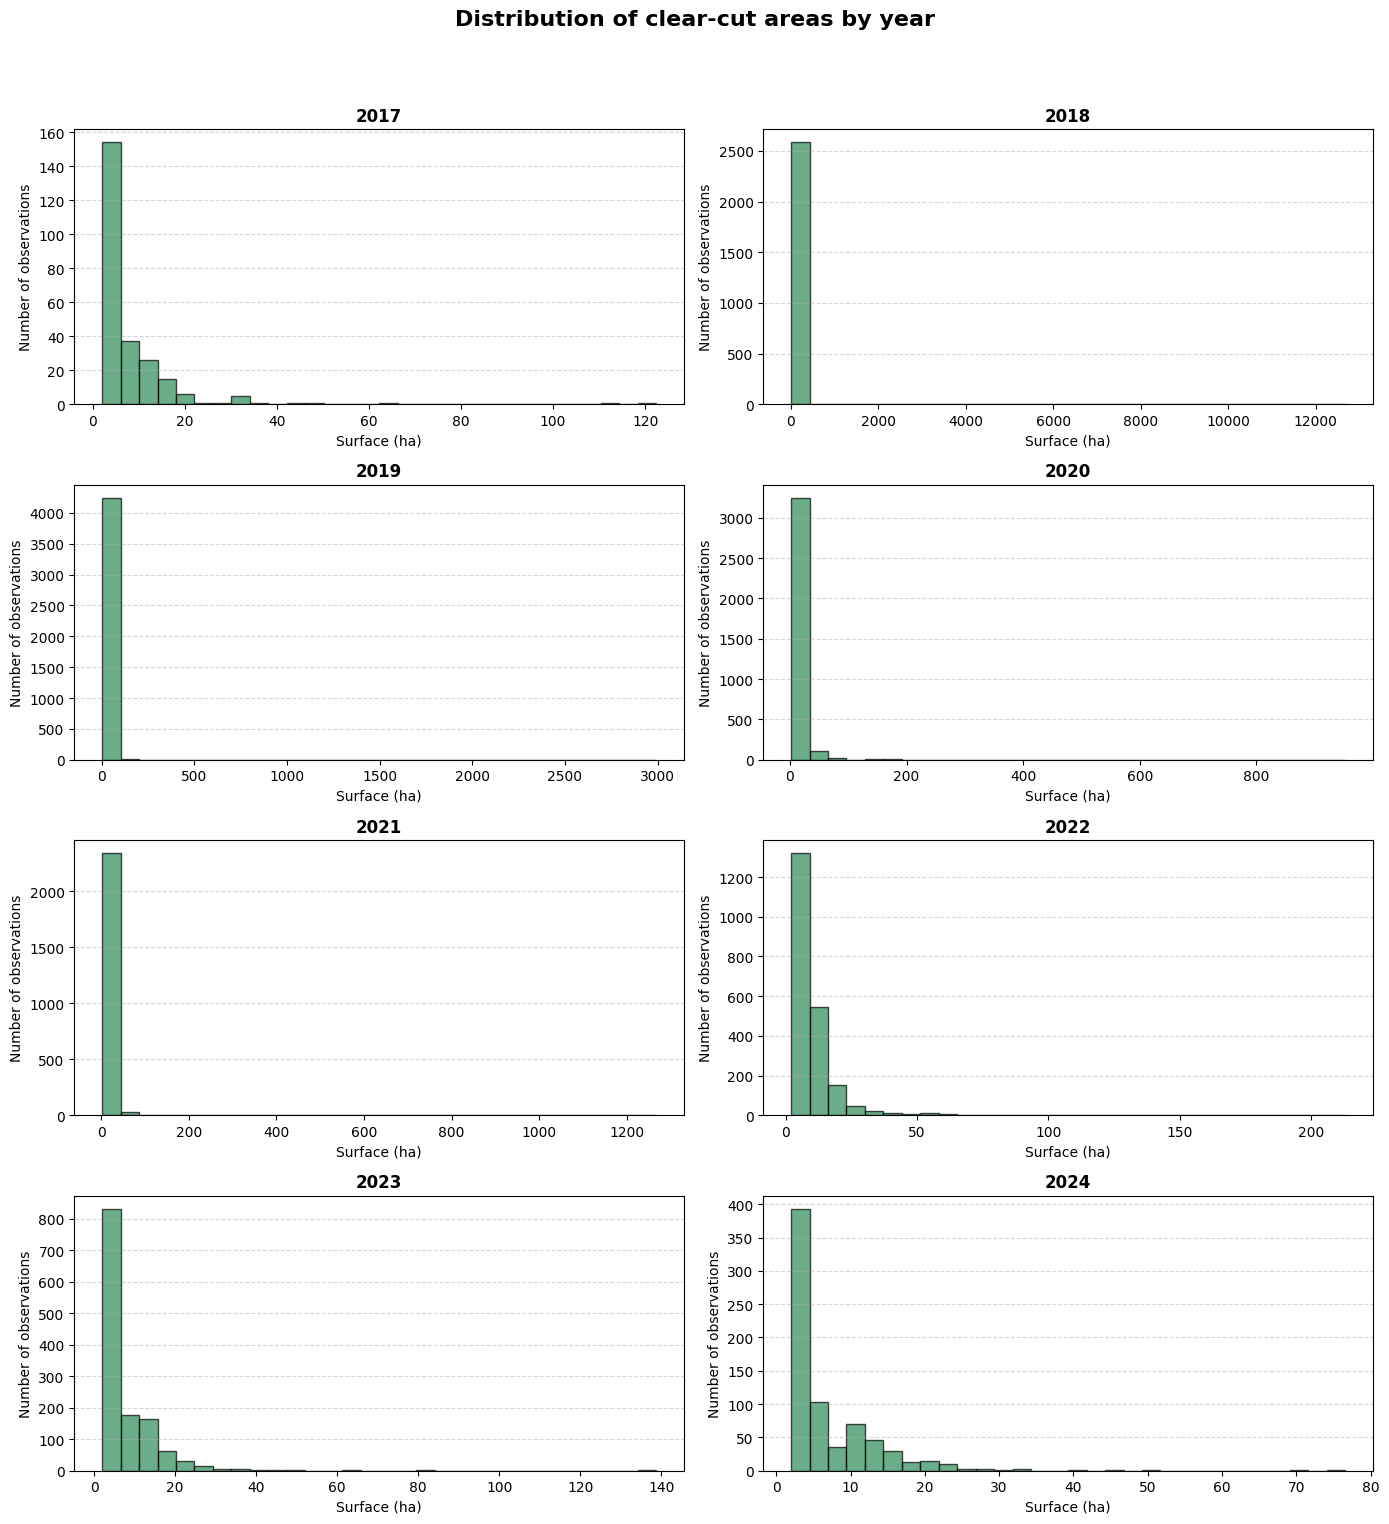

In [114]:
years = list(range(2017, 2025))
n_years = len(years)
rows, cols = 4, 2

fig, axes = plt.subplots(rows, cols, figsize=(14, 16))
axes = axes.flatten()

for i, year in enumerate(years):
    ax = axes[i]
    df_year = abusive_clear_cuts[abusive_clear_cuts["year"] == year]

    ax.hist(df_year["area_ha"], bins=30, edgecolor="black", alpha=0.7, color="seagreen")
    ax.set_title(f"{year}", fontsize=12, fontweight="bold")
    ax.set_xlabel("Surface (ha)", fontsize=10)
    ax.set_ylabel("Number of observations", fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.5)

# delete empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distribution of clear-cut areas by year", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Enregistrement
file_path = os.path.join(output_dir, "hist_area_by_year.png")
plt.savefig(file_path, dpi=300)
plt.show()

## Number of clear cuts for each criteria


In [115]:
def compute_abusive_stats(df):
    return {
        "Natura 2000>=2 ha": (
            (df["natura2000_area_ha"] >= 2)
            & (df["slope_area_ha"] < 2)
            & (df["area_ha"] < 10)
        ).sum(),
        "slope >= 30%>= 2 ha": (
            (df["natura2000_area_ha"] < 2)
            & (df["slope_area_ha"] >= 2)
            & (df["area_ha"] < 10)
        ).sum(),
        ">=10 ha": (
            (df["natura2000_area_ha"] < 2)
            & (df["slope_area_ha"] < 2)
            & (df["area_ha"] >= 10)
        ).sum(),
        "Natura 2000 & slope 30%": (
            (df["natura2000_area_ha"] >= 2)
            & (df["slope_area_ha"] >= 2)
            & (df["area_ha"] < 10)
        ).sum(),
        "Natura 2000 & 10 ha": (
            (df["natura2000_area_ha"] >= 2)
            & (df["slope_area_ha"] < 2)
            & (df["area_ha"] >= 10)
        ).sum(),
        "10 ha & slope 30%": (
            (df["natura2000_area_ha"] < 0.5)
            & (df["slope_area_ha"] >= 2)
            & (df["area_ha"] >= 10)
        ).sum(),
        "All 3 criteria": (
            (df["natura2000_area_ha"] >= 2)
            & (df["slope_area_ha"] >= 2)
            & (df["area_ha"] >= 10)
        ).sum(),
        "Total": len(df),
    }

In [116]:
type_by_year = {}

for year, group in abusive_clear_cuts.groupby("year"):
    type_by_year[year] = compute_abusive_stats(group)

# add total
type_by_year["Total"] = compute_abusive_stats(abusive_clear_cuts)

clear_cuts_type_years = pd.DataFrame(type_by_year)
clear_cuts_type_years.index.name = "clear cuts type"
clear_cuts_type_years = clear_cuts_type_years.reset_index()
clear_cuts_type_years

,clear cuts type,2017,2018,2019,2020,2021,2022,2023,2024,Total
0,Natura 2000>=2 ha,180,1136,1688,1553,1108,1057,718,386,7826
1,slope >= 30%>= 2 ha,2,153,318,248,265,255,189,133,1563
2,>=10 ha,16,902,1775,1230,772,630,318,173,5816
3,Natura 2000 & slope 30%,9,47,36,40,30,31,18,15,226
4,Natura 2000 & 10 ha,38,265,309,204,133,93,33,15,1090
5,10 ha & slope 30%,2,60,108,84,62,55,20,6,397
6,All 3 criteria,4,24,30,23,12,8,3,1,105
7,Total,251,2588,4268,3383,2382,2130,1300,729,17031


## Number and surface of Clear cuts over time


In [117]:
# extracting the date ( month and year)
abusive_clear_cuts["year_month"] = abusive_clear_cuts["date_min"].dt.to_period("M")
clear_cuts_per_month = (
    abusive_clear_cuts.groupby("year_month").size().reset_index(name="nb_cuts")
)
clear_cuts_per_month["year_month"] = clear_cuts_per_month[
    "year_month"
].dt.to_timestamp()
clear_cuts_per_month

c:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\python-template-vFWxdPwD-py3.13\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,year_month,nb_cuts
0,2017-10-01,65
1,2017-11-01,127
2,2017-12-01,59
3,2018-01-01,100
4,2018-02-01,77
...,...,...
81,2024-07-01,54
82,2024-08-01,24
83,2024-09-01,17
84,2024-10-01,8


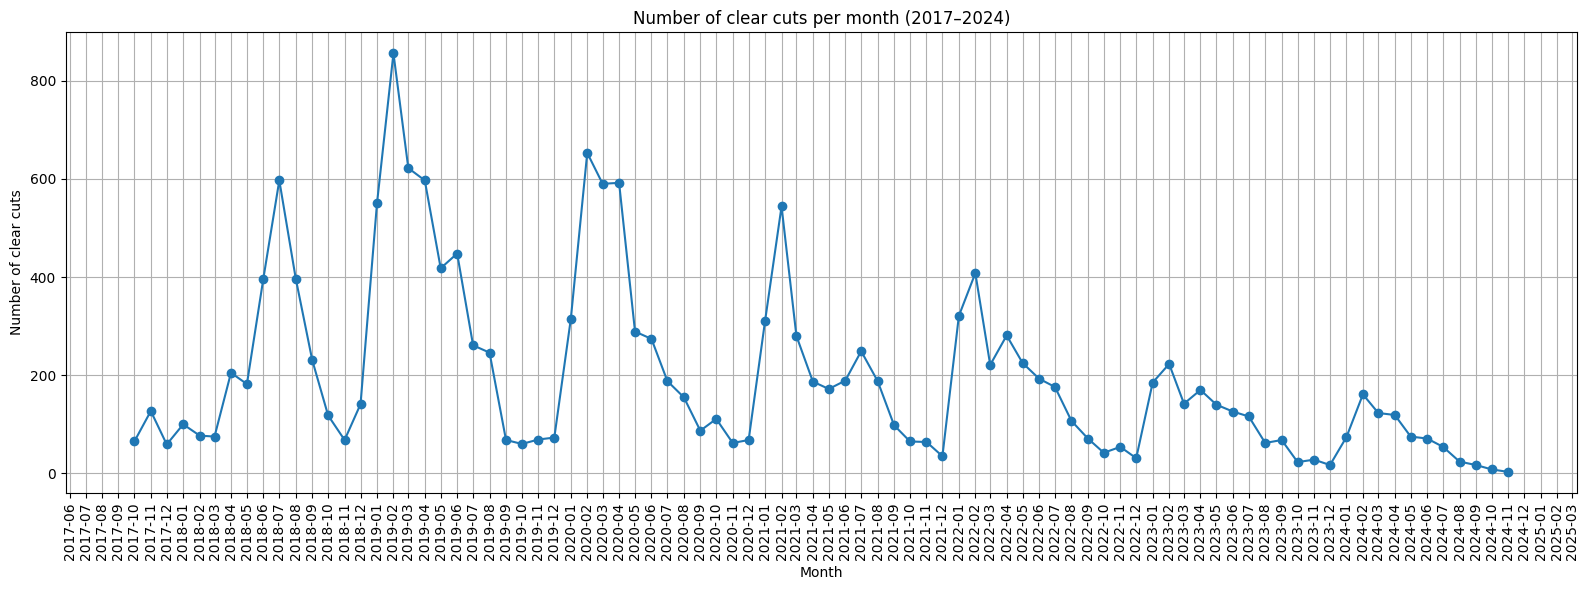

In [118]:
# Time series number of clear cuts
clear_cuts_per_month["year_month"] = pd.to_datetime(
    clear_cuts_per_month["year_month"].astype(str)
)

plt.figure(figsize=(16, 6))
plt.plot(
    clear_cuts_per_month["year_month"],
    clear_cuts_per_month["nb_cuts"],
    marker="o",
    linestyle="-",
)

plt.title("Number of clear cuts per month (2017–2024)")
plt.xlabel("Month")
plt.ylabel("Number of clear cuts")
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(rotation=90)

plt.tight_layout()
# saving
file_path = os.path.join(output_dir, "nb_clear_cuts_2018_2024.png")
plt.savefig(file_path, dpi=300)
plt.show()

In [119]:
# Area per month
abusive_clear_cuts["year_month"] = abusive_clear_cuts["date_min"].dt.to_period("M")

# hectares per month
area_per_month = abusive_clear_cuts.groupby("year_month")["area_ha"].sum().reset_index()

# convert to date time
area_per_month["year_month"] = area_per_month["year_month"].dt.to_timestamp()

c:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\python-template-vFWxdPwD-py3.13\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


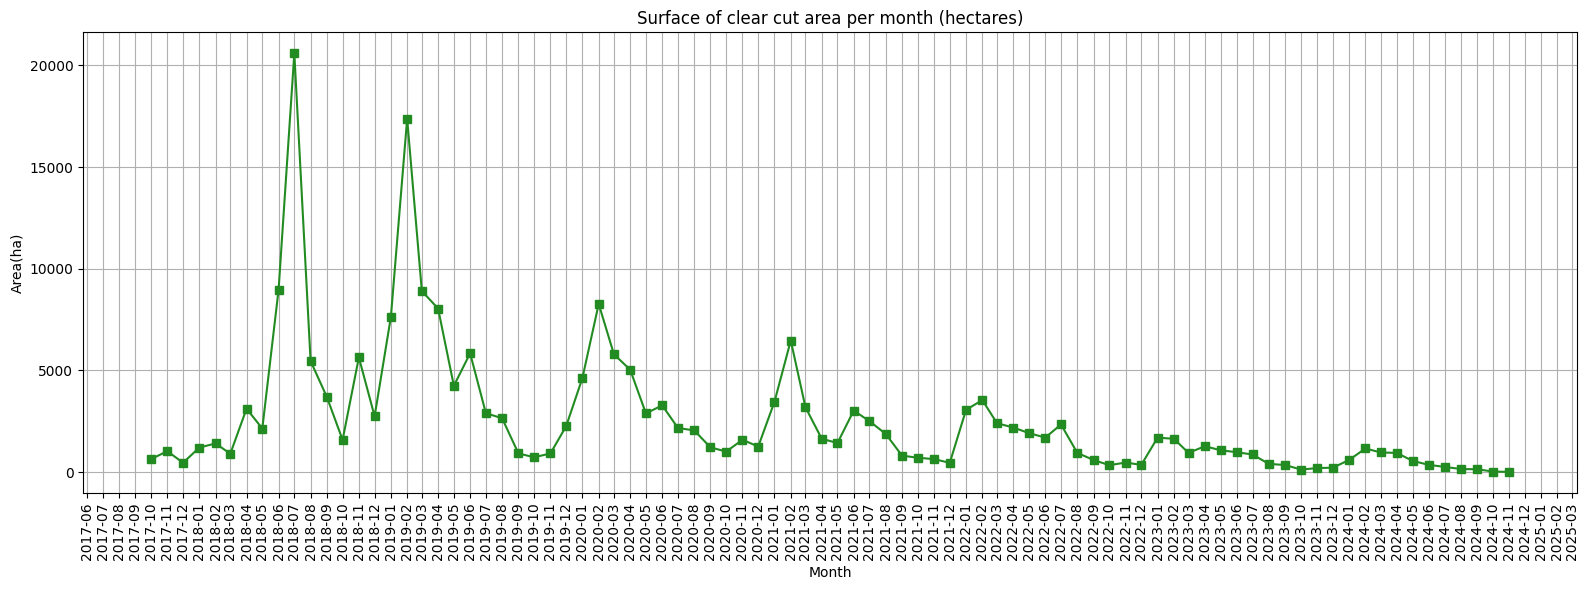

In [120]:
# time series area per month in hectares
plt.figure(figsize=(16, 6))
plt.plot(
    area_per_month["year_month"],
    area_per_month["area_ha"],
    marker="s",
    linestyle="-",
    color="forestgreen",
)

plt.title("Surface of clear cut area per month (hectares)")
plt.xlabel("Month")
plt.ylabel("Area(ha)")
plt.grid(True)

# axis per month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=90)

plt.tight_layout()
# saving
file_path = os.path.join(output_dir, "area_clear_cuts_2018_2024.png")
plt.savefig(file_path, dpi=300)
plt.show()

# Clear cuts per regions


## Time series by region


c:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\python-template-vFWxdPwD-py3.13\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\python-template-vFWxdPwD-py3.13\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


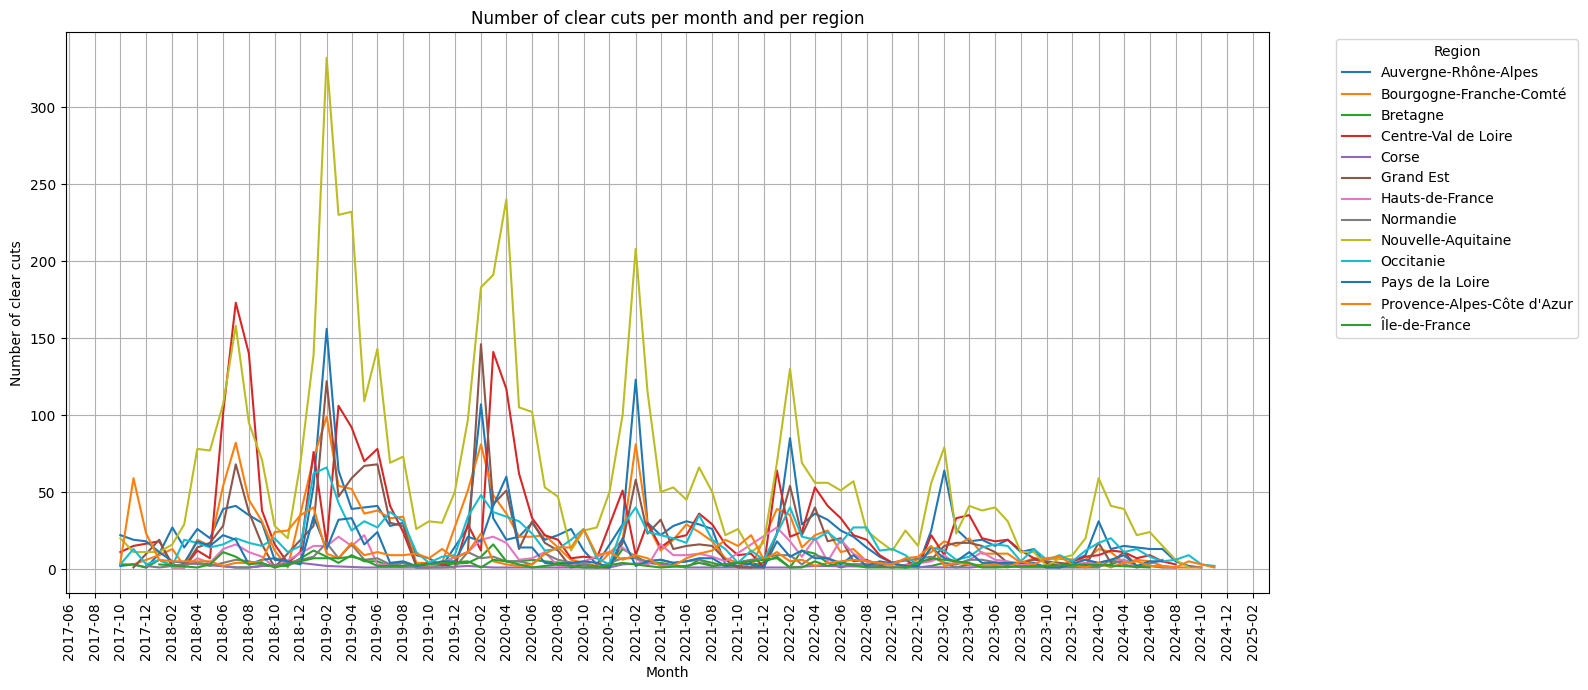

In [121]:
# Number of clear cuts per region
abusive_clear_cuts["year_month"] = abusive_clear_cuts["date_min"].dt.to_period("M")
abusive_clear_cuts["year_month_dt"] = abusive_clear_cuts["year_month"].dt.to_timestamp()

clear_cuts_per_months_region = (
    abusive_clear_cuts.groupby(["region_name", "year_month_dt"])
    .size()
    .reset_index(name="nb_cuts")
)

plt.figure(figsize=(16, 7))

# curve for each region
for region_name, group in clear_cuts_per_months_region.groupby("region_name"):
    plt.plot(group["year_month_dt"], group["nb_cuts"], label=region_name)

plt.title("Number of clear cuts per month and per region")
plt.xlabel("Month")
plt.ylabel("Number of clear cuts")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=90)

plt.tight_layout()
# saving
file_path = os.path.join(output_dir, "nb_clear_cuts_2017_2024_per_region.png")
plt.savefig(file_path, dpi=300)
plt.show()

In [122]:
# 5 top regions nbr of cuts
top_regions_cuts = abusive_clear_cuts["region_name"].value_counts().nlargest(5).index

# keep only top regions
abusive_top = abusive_clear_cuts[
    abusive_clear_cuts["region_name"].isin(top_regions_cuts)
]

c:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\python-template-vFWxdPwD-py3.13\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


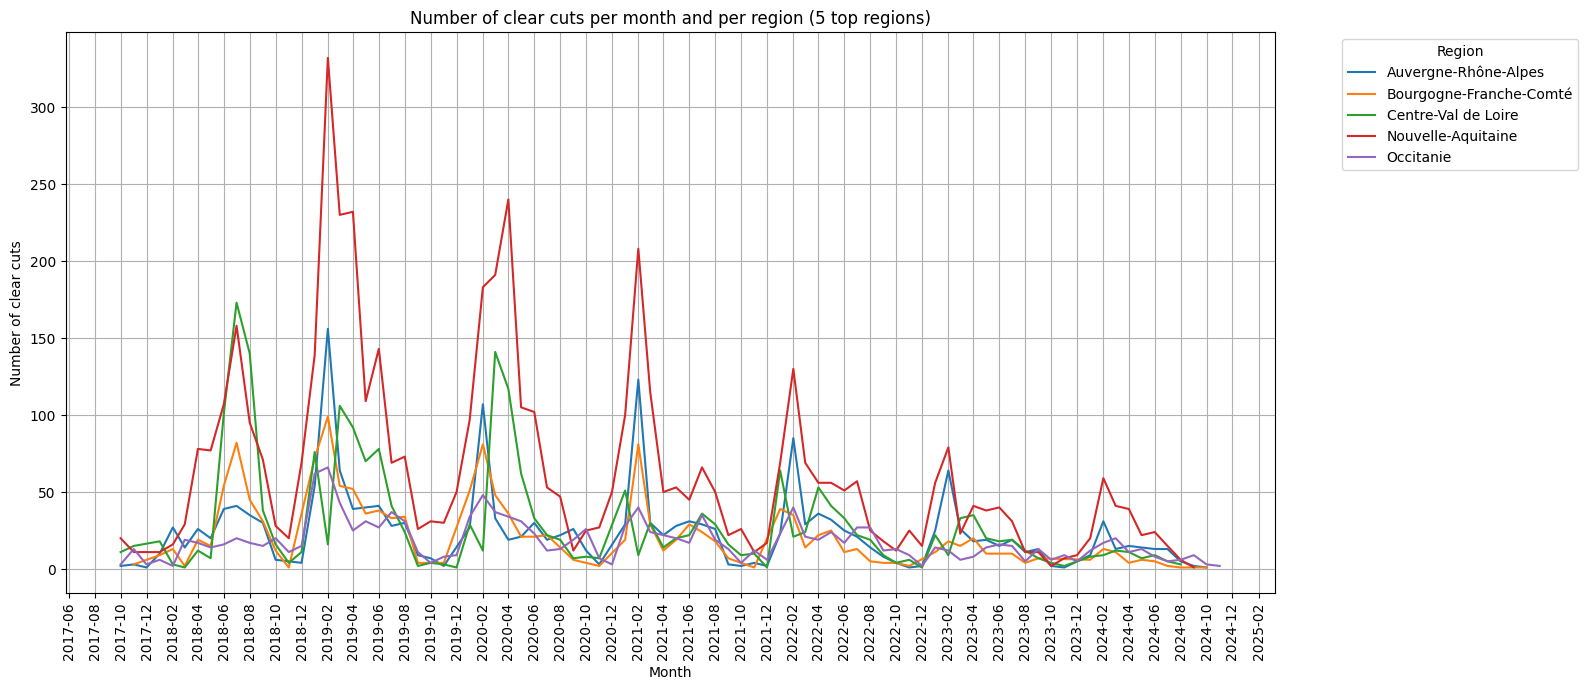

In [123]:
# representing evolution of the top 5 region
abusive_top["year_month"] = abusive_top["date_min"].dt.to_period("M")
abusive_top["year_month_dt"] = abusive_top["year_month"].dt.to_timestamp()

clear_cuts_per_months_region = (
    abusive_top.groupby(["region_name", "year_month_dt"])
    .size()
    .reset_index(name="nb_cuts")
)

plt.figure(figsize=(16, 7))

# one curve per region
for region_name, group in clear_cuts_per_months_region.groupby("region_name"):
    plt.plot(group["year_month_dt"], group["nb_cuts"], label=region_name)

plt.title("Number of clear cuts per month and per region (5 top regions)")
plt.xlabel("Month")
plt.ylabel("Number of clear cuts")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=90)

plt.tight_layout()
# saving
file_path = os.path.join(output_dir, "nb_clear_cuts_2017_2024_top5.png")
plt.savefig(file_path, dpi=300)
plt.show()

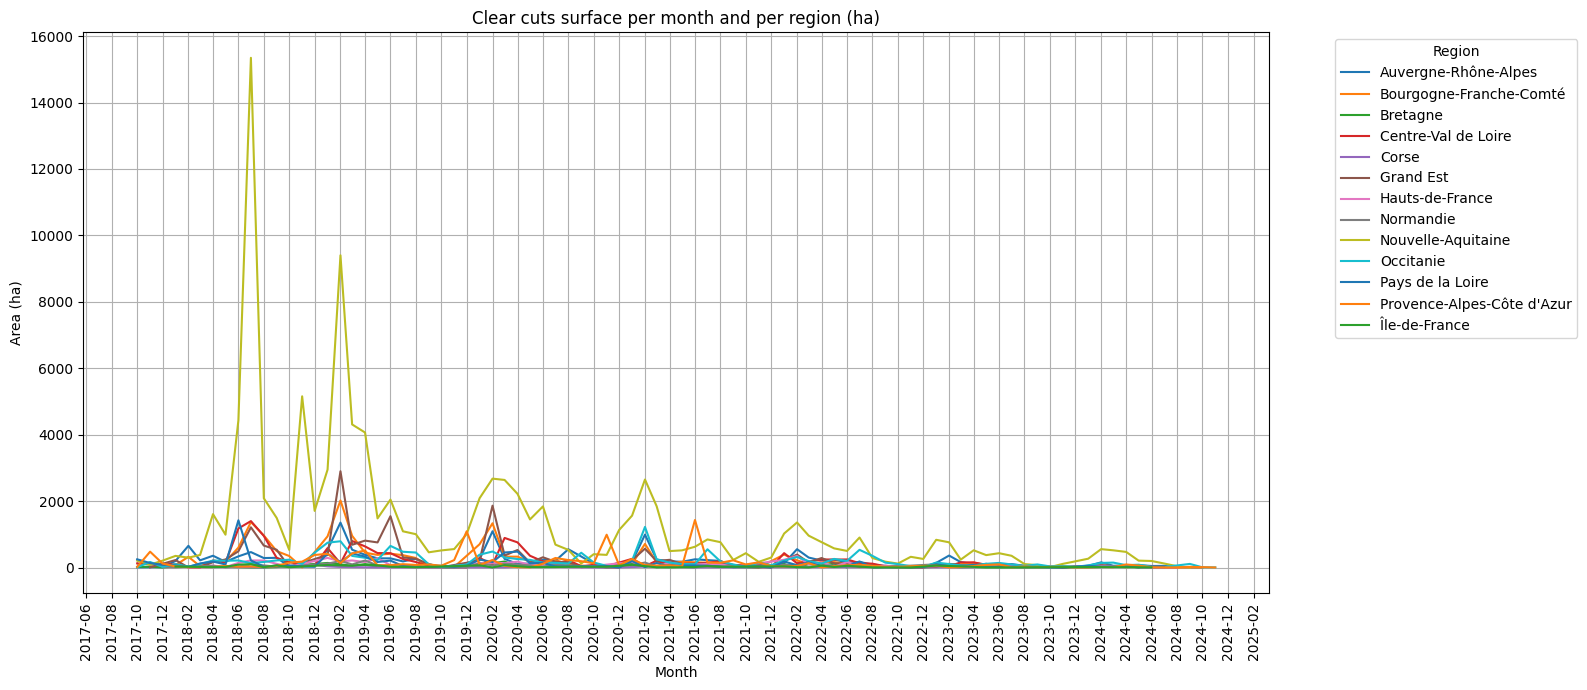

In [124]:
# sum hectares per region
area_per_region_month = (
    abusive_clear_cuts.groupby(["region_name", "year_month_dt"])["area_ha"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(16, 7))

# one curve for each region
for region_name, group in area_per_region_month.groupby("region_name"):
    plt.plot(group["year_month_dt"], group["area_ha"], label=region_name)

plt.title("Clear cuts surface per month and per region (ha)")
plt.xlabel("Month")
plt.ylabel("Area (ha)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=90)

plt.tight_layout()
# saving
file_path = os.path.join(output_dir, "area_clear_cuts_2018_2024_region.png")
plt.savefig(file_path, dpi=300)
plt.show()

In [125]:
# selecting the 5 regions with the largest clear-cut area
top_regions_surface = (
    abusive_clear_cuts.groupby("region_name")["area_ha"].sum().nlargest(5).index
)
abusive_top_surface = abusive_clear_cuts[
    abusive_clear_cuts["region_name"].isin(top_regions_surface)
]

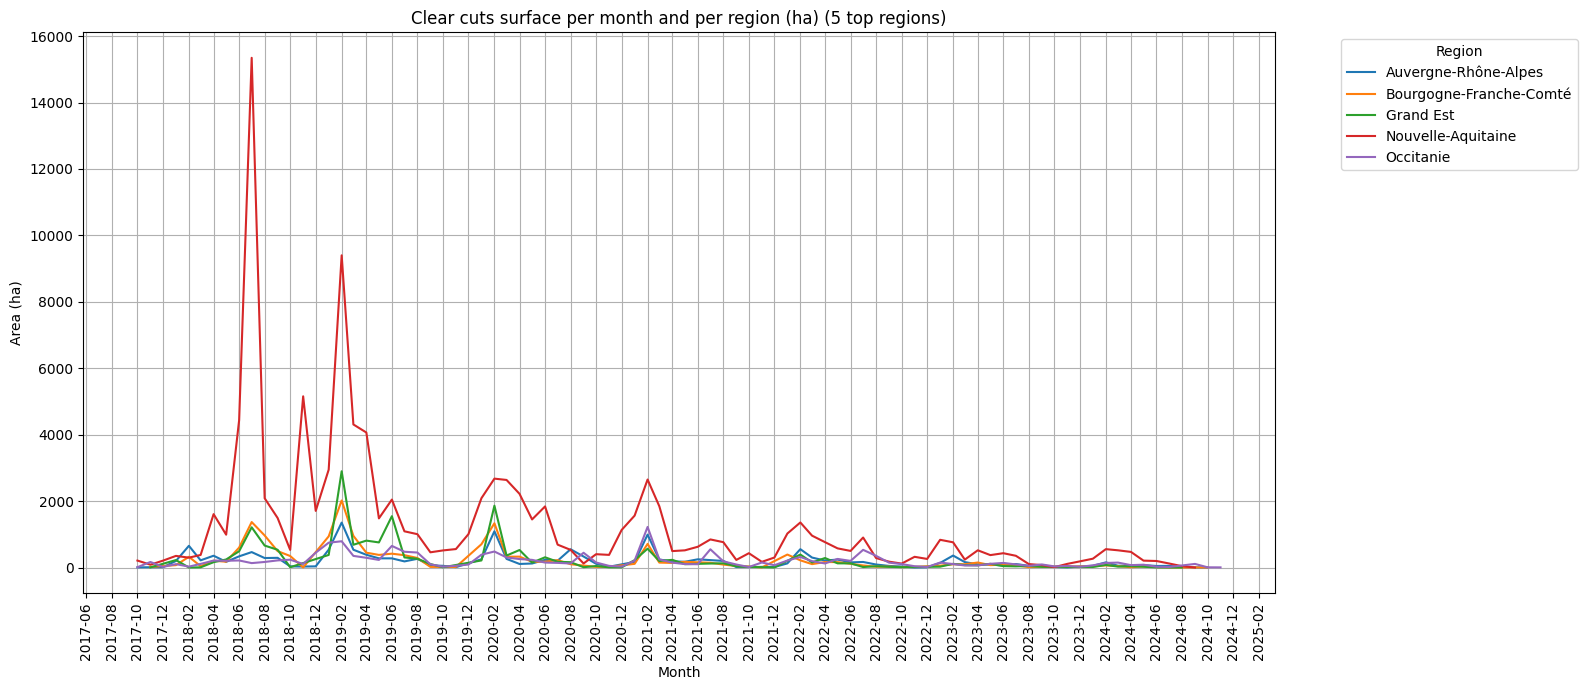

In [126]:
# time series top 5 largest area
area_per_region_month = (
    abusive_top_surface.groupby(["region_name", "year_month_dt"])["area_ha"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(16, 7))

for region_name, group in area_per_region_month.groupby("region_name"):
    plt.plot(group["year_month_dt"], group["area_ha"], label=region_name)

plt.title("Clear cuts surface per month and per region (ha) (5 top regions)")
plt.xlabel("Month")
plt.ylabel("Area (ha)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=90)

plt.tight_layout()
# saving
file_path = os.path.join(output_dir, "area_clear_cuts_2017_2024_top5.png")
plt.savefig(file_path, dpi=300)
plt.show()

## Stats per region over the years


In [127]:
# stats for each region
counts_per_region_year = (
    abusive_clear_cuts.groupby(["region_name", "year"])
    .agg(
        total=("area_ha", "count"),
        sum_area_ha=("area_ha", "sum"),
        nb_10_ha=(
            "area_ha",
            lambda x: (
                (x >= 10)
                & (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] < 2)
                & (abusive_clear_cuts.loc[x.index, "slope_area_ha"] < 2)
            ).sum(),
        ),
        nb_natura_2000=(
            "area_ha",
            lambda x: (
                (x < 10)
                & (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] >= 2)
                & (abusive_clear_cuts.loc[x.index, "slope_area_ha"] < 2)
            ).sum(),
        ),
        nb_slope_30=(
            "area_ha",
            lambda x: (
                (x < 10)
                & (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] < 2)
                & (abusive_clear_cuts.loc[x.index, "slope_area_ha"] >= 2)
            ).sum(),
        ),
        overlap_10ha_natura2000=(
            "area_ha",
            lambda x: (
                (x >= 10)
                & (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] >= 2)
                & (abusive_clear_cuts.loc[x.index, "slope_area_ha"] < 2)
            ).sum(),
        ),
        overlap_10ha_slope30=(
            "area_ha",
            lambda x: (
                (x >= 10)
                & (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] < 2)
                & (abusive_clear_cuts.loc[x.index, "slope_area_ha"] >= 2)
            ).sum(),
        ),
        overlap_natura2000_slope30=(
            "area_ha",
            lambda x: (
                (x < 10)
                & (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] >= 2)
                & (abusive_clear_cuts.loc[x.index, "slope_area_ha"] >= 2)
            ).sum(),
        ),
        overlap_triple=(
            "area_ha",
            lambda x: (
                (x >= 10)
                & (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] >= 2)
                & (abusive_clear_cuts.loc[x.index, "slope_area_ha"] >= 2)
            ).sum(),
        ),
    )
    .reset_index()
)

regions_clear_cuts_count = counts_per_region_year.pivot(
    index="region_name", columns="year"
)

# Aplatir les colonnes multi-index
regions_clear_cuts_count.columns = [
    f"{stat}_{year}" for stat, year in regions_clear_cuts_count.columns
]

# Remettre l'index à plat
regions_clear_cuts_count = regions_clear_cuts_count.reset_index()
# rounding all columns except the area
cols_to_exclude = [
    col for col in regions_clear_cuts_count.columns if col.startswith("sum_area_ha_")
]

cols_to_round = [
    col
    for col in regions_clear_cuts_count.columns
    if col not in cols_to_exclude
    and regions_clear_cuts_count[col].dtype in ["float64", "int64"]
]

# Arrondir à l’unité
regions_clear_cuts_count[cols_to_round] = (
    regions_clear_cuts_count[cols_to_round].round(0).astype("Int64")
)
regions_clear_cuts_count

,region_name,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022,total_2023,total_2024,sum_area_ha_2017,...,overlap_natura2000_slope30_2023,overlap_natura2000_slope30_2024,overlap_triple_2017,overlap_triple_2018,overlap_triple_2019,overlap_triple_2020,overlap_triple_2021,overlap_triple_2022,overlap_triple_2023,overlap_triple_2024
0,Auvergne-Rhône-Alpes,6,257,470,319,329,280,213,116,25.100118,...,5,5,0,12,7,6,1,0,0,0
1,Bourgogne-Franche-Comté,3,283,426,306,243,174,105,49,20.220071,...,2,2,0,1,3,5,3,1,1,0
2,Bretagne,7,21,54,50,31,46,14,15,48.880268,...,0,0,0,0,1,0,0,0,0,0
3,Centre-Val de Loire,26,524,513,457,247,297,181,64,223.280999,...,0,0,0,0,0,0,0,0,0,0
4,Corse,<NA>,12,8,7,9,3,7,<NA>,NaN,...,0,<NA>,<NA>,0,0,0,1,0,0,<NA>
5,Grand Est,1,202,452,329,197,191,95,40,5.150019,...,0,0,0,1,7,1,0,3,0,0
6,Hauts-de-France,<NA>,62,97,96,80,117,52,24,NaN,...,0,0,<NA>,0,1,0,0,0,0,0
7,Normandie,2,29,71,56,45,47,32,18,13.440071,...,0,0,0,0,0,0,0,0,0,0
8,Nouvelle-Aquitaine,42,759,1464,1132,763,583,348,227,505.471939,...,2,1,0,5,2,3,1,1,0,0
9,Occitanie,19,172,354,287,240,234,123,106,198.270894,...,8,6,0,5,8,3,5,3,2,1


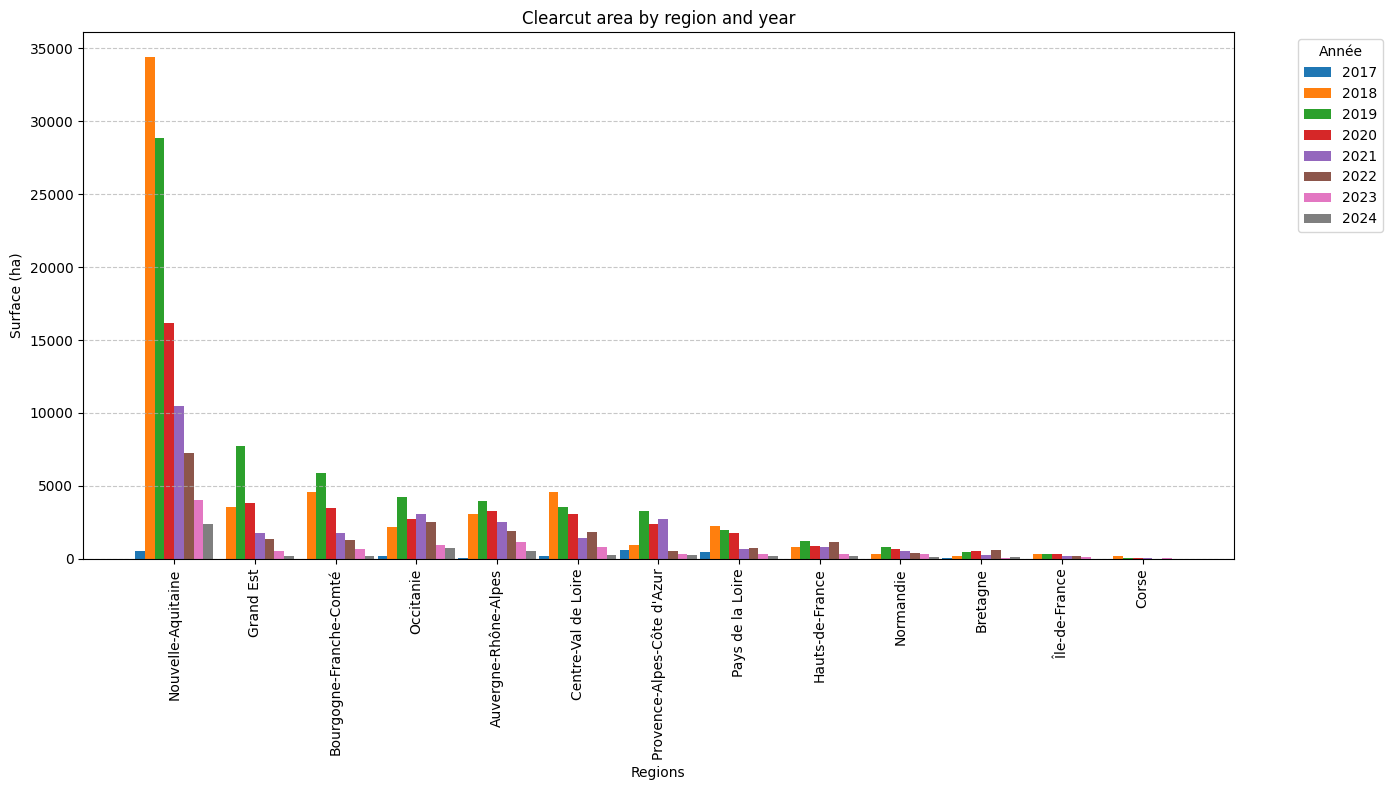

In [128]:
area_per_region_year = (
    abusive_clear_cuts.groupby(["region_name", "year"])["area_ha"].sum().reset_index()
)

pivot = area_per_region_year.pivot(
    index="region_name", columns="year", values="area_ha"
).fillna(0)

pivot["total"] = pivot.sum(axis=1)
pivot = pivot.sort_values(by="total", ascending=False).drop(columns="total")

plt.figure(figsize=(14, 8))

bar_width = 0.12
regions = pivot.index
years = pivot.columns
x = np.arange(len(regions))

for i, year in enumerate(years):
    plt.bar(x + i * bar_width, pivot[year], width=bar_width, label=str(year))


plt.xticks(x + bar_width * (len(years) - 1) / 2, regions, rotation=90)
plt.xlabel("Regions")
plt.ylabel("Surface (ha)")
plt.title("Clearcut area by region and year")
plt.legend(title="Année", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Sauvegarde
file_path = os.path.join(output_dir, "graphbar_surface_per_region_per_year.png")
plt.tight_layout()
plt.savefig(file_path, dpi=300)
plt.show()

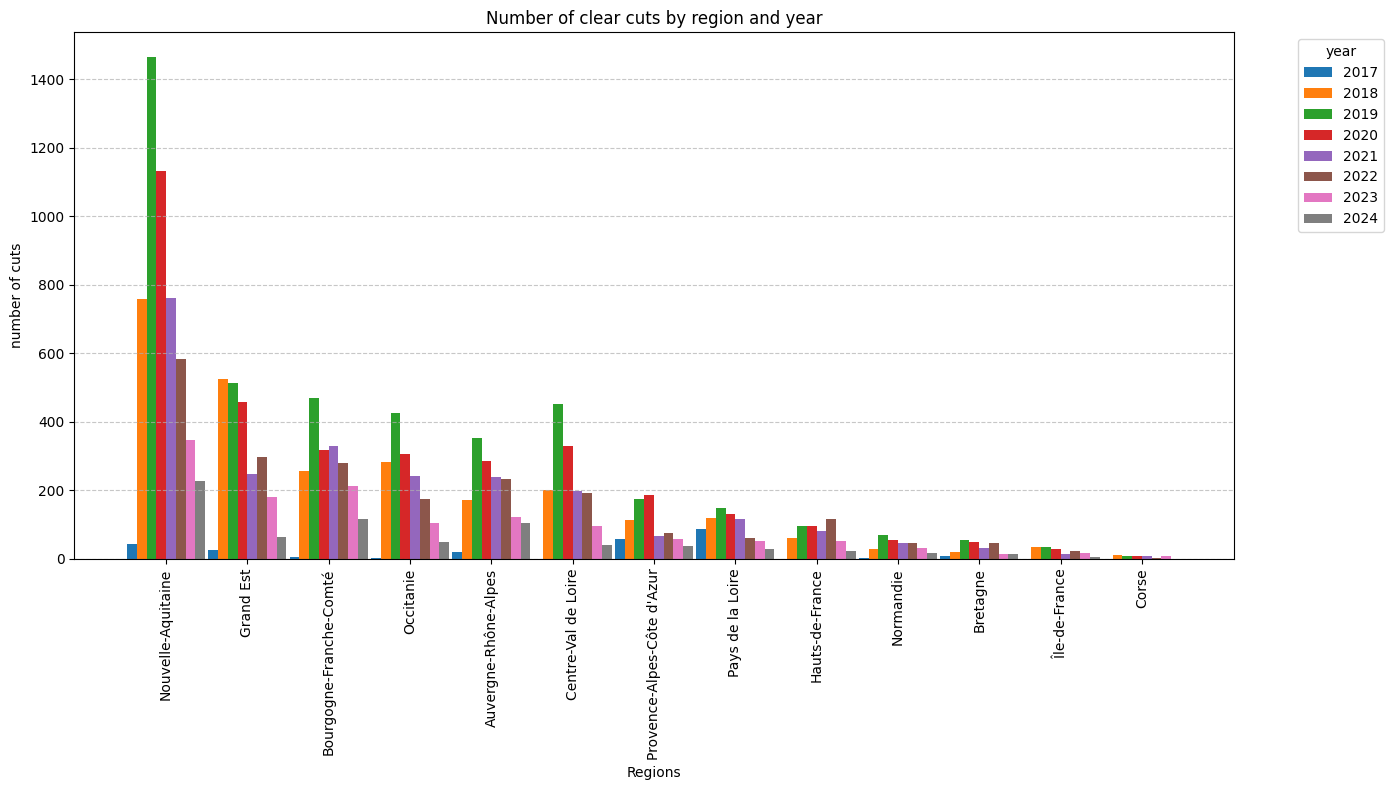

In [129]:
cuts_per_region_year = (
    abusive_clear_cuts.groupby(["region_name", "year"])
    .size()  # Utilisation de size() pour compter les lignes (cuts)
    .reset_index(name="nb_cuts")
)

# Pivot pour avoir régions x années
pivot_cuts = cuts_per_region_year.pivot(
    index="region_name", columns="year", values="nb_cuts"
).fillna(0)

# Trier les régions par nombre total de cuts
pivot_cuts["total"] = pivot_cuts.sum(axis=1)
pivot_cuts = pivot_cuts.sort_values(by="total", ascending=False).drop(columns="total")

plt.figure(figsize=(14, 8))

bar_width = 0.12
regions = pivot.index
years = pivot.columns
x = np.arange(len(regions))

for i, year in enumerate(years):
    plt.bar(x + i * bar_width, pivot_cuts[year], width=bar_width, label=str(year))


# Légendes et axes
plt.xticks(x + bar_width * (len(years) - 1) / 2, regions, rotation=90)
plt.xlabel("Regions")
plt.ylabel("number of cuts")
plt.title("Number of clear cuts by region and year")
plt.legend(title="year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Sauvegarde
file_path = os.path.join(output_dir, "graphbar_clear_cuts_per_region_per_year.png")
plt.tight_layout()
plt.savefig(file_path, dpi=300)
plt.show()

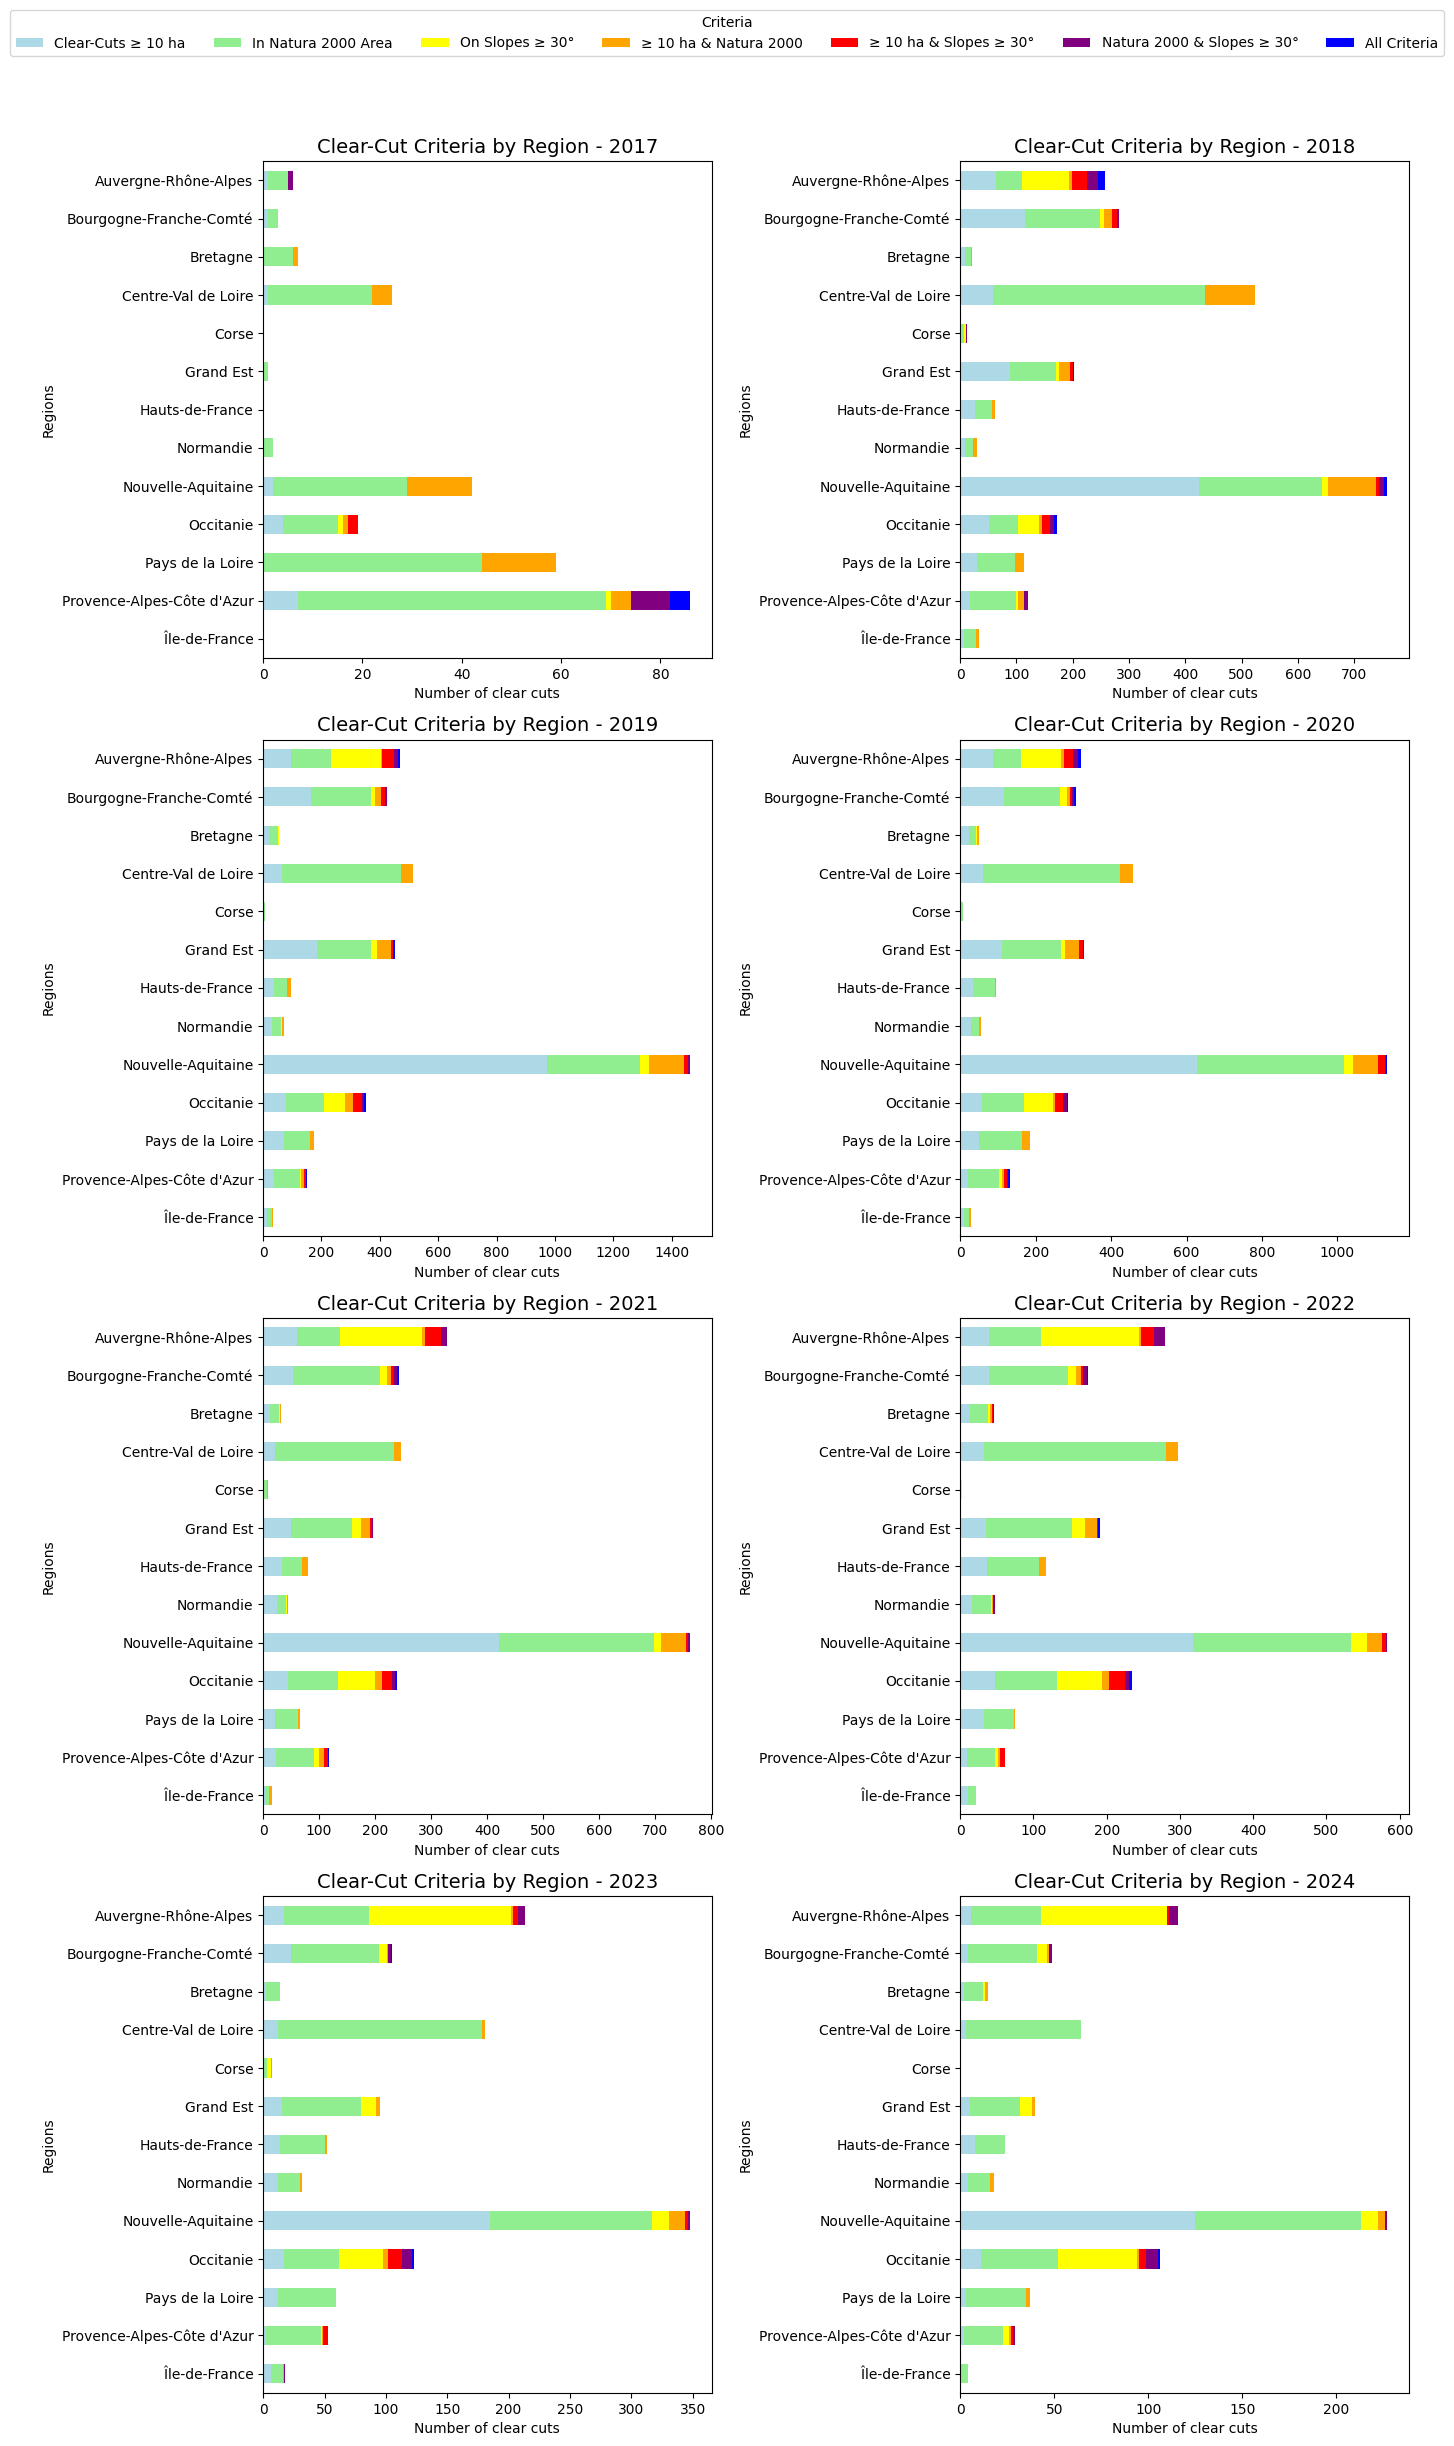

In [130]:
# labels
legend_labels = {
    "nb_10_ha": "Clear-Cuts ≥ 10 ha",
    "nb_natura_2000": "In Natura 2000 Area",
    "nb_slope_30": "On Slopes ≥ 30°",
    "overlap_10ha_natura2000": "≥ 10 ha & Natura 2000",
    "overlap_10ha_slope30": "≥ 10 ha & Slopes ≥ 30°",
    "overlap_natura2000_slope30": "Natura 2000 & Slopes ≥ 30°",
    "overlap_triple": "All Criteria",
}

color_map = {
    "Clear-Cuts ≥ 10 ha": "lightblue",
    "In Natura 2000 Area": "lightgreen",
    "On Slopes ≥ 30°": "yellow",
    "≥ 10 ha & Natura 2000": "orange",
    "≥ 10 ha & Slopes ≥ 30°": "red",
    "Natura 2000 & Slopes ≥ 30°": "purple",
    "All Criteria": "blue",
}

years = sorted(
    set(
        col.split("_")[-1]
        for col in regions_clear_cuts_count.columns
        if col.startswith("nb_10_ha_")
    )
)
n_years = len(years)

total_all_years = pd.DataFrame(index=regions_clear_cuts_count["region_name"])

for key in legend_labels.keys():
    cols = [
        col for col in regions_clear_cuts_count.columns if col.startswith(f"{key}_")
    ]
    total_all_years[key] = regions_clear_cuts_count[cols].sum(axis=1)

region_order = total_all_years.sum(axis=1).sort_values(ascending=False).index.tolist()

ncols = 2 if n_years > 1 else 1
nrows = math.ceil(n_years / ncols)

fig, axes = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(14, 6 * nrows), squeeze=False
)

# one plot per year
for i, year in enumerate(years):
    row, col = divmod(i, ncols)
    ax = axes[row][col]

    cols = [f"{key}_{year}" for key in legend_labels.keys()]
    data = regions_clear_cuts_count[["region_name"] + cols].copy()
    data = data.set_index("region_name")
    data.columns = [legend_labels[key] for key in legend_labels]

    data = data.loc[region_order]

    data.plot(
        kind="barh",
        stacked=True,
        ax=ax,
        legend=False,
        color=[color_map[label] for label in data.columns],
    )

    ax.set_title(f"Clear-Cut Criteria by Region - {year}", fontsize=14)
    ax.set_xlabel("Number of clear cuts")
    ax.set_ylabel("Regions")
    ax.invert_yaxis()

# legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title="Criteria",
    loc="upper center",
    ncol=len(labels),
    bbox_to_anchor=(0.5, 1.02),
)

plt.tight_layout(rect=[0, 0, 1, 0.97])

# saving the plot
output_path = os.path.join(output_dir, "clear_cuts_criteria_by_region_all_years.png")
plt.savefig(output_path, dpi=300)
plt.show()

# Clear cuts per department


In [131]:
counts_per_dpt_year = (
    abusive_clear_cuts.groupby(["dpt_name", "year"])
    .agg(
        total=("area_ha", "count"),
        sum_area_ha=("area_ha", "sum"),
        nb_10_ha=("area_ha", lambda x: (x >= 10).sum()),
        nb_natura_2000=("natura2000_area_ha", lambda x: (x >= 2).sum()),
        nb_slope_30=("slope_area_ha", lambda x: (x >= 2).sum()),
        overlap_10ha_natura2000=(
            "area_ha",
            lambda x: (
                (x >= 10)
                & (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] >= 2)
                & (abusive_clear_cuts.loc[x.index, "slope_area_ha"] < 2)
            ).sum(),
        ),
        overlap_10ha_slope30=(
            "area_ha",
            lambda x: (
                (x >= 10)
                & (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] < 2)
                & (abusive_clear_cuts.loc[x.index, "slope_area_ha"] >= 2)
            ).sum(),
        ),
        overlap_natura2000_slope30=(
            "area_ha",
            lambda x: (
                (x < 10)
                & (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] >= 2)
                & (abusive_clear_cuts.loc[x.index, "slope_area_ha"] >= 2)
            ).sum(),
        ),
        overlap_triple=(
            "area_ha",
            lambda x: (
                (x >= 10)
                & (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] >= 2)
                & (abusive_clear_cuts.loc[x.index, "slope_area_ha"] >= 2)
            ).sum(),
        ),
    )
    .reset_index()
)

dpt_clear_cuts_count = counts_per_dpt_year.pivot(index="dpt_name", columns="year")

dpt_clear_cuts_count.columns = [
    f"{stat}_{year}" for stat, year in dpt_clear_cuts_count.columns
]

dpt_clear_cuts_count = dpt_clear_cuts_count.reset_index()

cols_to_exclude = [
    col for col in dpt_clear_cuts_count.columns if col.startswith("sum_area_ha_")
]

cols_to_round = [
    col
    for col in dpt_clear_cuts_count.columns
    if col not in cols_to_exclude
    and dpt_clear_cuts_count[col].dtype in ["float64", "int64"]
]

dpt_clear_cuts_count[cols_to_round] = (
    dpt_clear_cuts_count[cols_to_round].round(0).astype("Int64")
)  # Int64 gère les NaN aussi

dpt_clear_cuts_count

,dpt_name,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022,total_2023,total_2024,sum_area_ha_2017,...,overlap_natura2000_slope30_2023,overlap_natura2000_slope30_2024,overlap_triple_2017,overlap_triple_2018,overlap_triple_2019,overlap_triple_2020,overlap_triple_2021,overlap_triple_2022,overlap_triple_2023,overlap_triple_2024
0,Ain,1,4,21,18,20,18,18,12,2.200020,...,0,0,0,0,0,0,0,0,0,0
1,Aisne,<NA>,22,44,34,28,35,18,12,NaN,...,0,0,<NA>,0,1,0,0,0,0,0
2,Allier,1,27,26,18,16,12,9,5,2.020010,...,0,0,0,0,0,0,0,0,0,0
3,Alpes-Maritimes,<NA>,<NA>,9,19,3,2,<NA>,1,NaN,...,<NA>,0,<NA>,<NA>,0,0,0,0,<NA>,0
4,Alpes-de-Haute-Provence,1,7,24,14,8,10,9,4,3.040024,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Vendée,1,19,7,7,7,6,2,<NA>,3.360021,...,0,<NA>,0,0,0,0,0,0,0,<NA>
89,Vienne,1,19,25,53,23,22,13,5,111.220225,...,0,0,0,0,0,0,0,0,0,0
90,Vosges,<NA>,18,38,35,23,10,9,<NA>,NaN,...,0,<NA>,<NA>,0,0,0,0,0,0,<NA>
91,Yonne,<NA>,20,19,13,5,7,4,<NA>,NaN,...,0,<NA>,<NA>,0,0,0,0,0,0,<NA>


## Maps


In [ ]:
# preparing data to map the departement
dpt: gpd.GeoDataFrame = gpd.read_file(
    "../analytics/data/cadastre/cadastre_france_departments.fgb"
)

# merging datasets
map_dpt = dpt.merge(
    dpt_clear_cuts_count, left_on="name", right_on="dpt_name", how="left"
)
map_dpt = map_dpt.rename(columns={"code_insee": "dpt_code", "name": "dpt_name"})
map_dpt

,dpt_code,dpt_name,geometry,dpt_name,total_2017,total_2018,total_2019,total_2020,total_2021,total_2022,...,overlap_natura2000_slope30_2023,overlap_natura2000_slope30_2024,overlap_triple_2017,overlap_triple_2018,overlap_triple_2019,overlap_triple_2020,overlap_triple_2021,overlap_triple_2022,overlap_triple_2023,overlap_triple_2024
0,2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774...",Corse-du-Sud,<NA>,1,2,1,3,2,...,0,<NA>,<NA>,0,0,0,0,0,0,<NA>
1,2B,Haute-Corse,"MULTIPOLYGON (((1159416.005 6158689.756, 11594...",Haute-Corse,<NA>,11,6,6,6,1,...,0,<NA>,<NA>,0,0,0,1,0,0,<NA>
2,83,Var,"MULTIPOLYGON (((914567.676 6279020.989, 914575...",Var,5,16,25,15,42,10,...,0,0,0,0,1,1,1,0,0,0
3,34,Hérault,"MULTIPOLYGON (((662645.732 6249747.417, 662666...",Hérault,3,6,29,12,18,19,...,0,0,0,0,0,0,0,0,0,1
4,13,Bouches-du-Rhône,"MULTIPOLYGON (((799594.601 6263150.832, 799602...",Bouches-du-Rhône,66,76,67,64,50,33,...,0,1,3,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,31,Haute-Garonne,"MULTIPOLYGON (((491715.551 6229117.37, 492178....",Haute-Garonne,<NA>,9,7,11,5,6,...,0,0,<NA>,0,0,0,0,0,0,0
93,81,Tarn,"MULTIPOLYGON (((582445.189 6318934.642, 582462...",Tarn,1,48,69,62,56,64,...,4,1,0,2,3,0,0,0,0,0
94,11,Aude,"MULTIPOLYGON (((593491.217 6242495.488, 593597...",Aude,3,12,37,36,42,28,...,0,1,0,1,3,0,2,1,0,0
95,09,Ariège,"MULTIPOLYGON (((522392.652 6204087.047, 522457...",Ariège,<NA>,16,7,4,7,6,...,<NA>,0,<NA>,1,1,0,0,0,<NA>,0


Maps number and area of clear cuts per departments


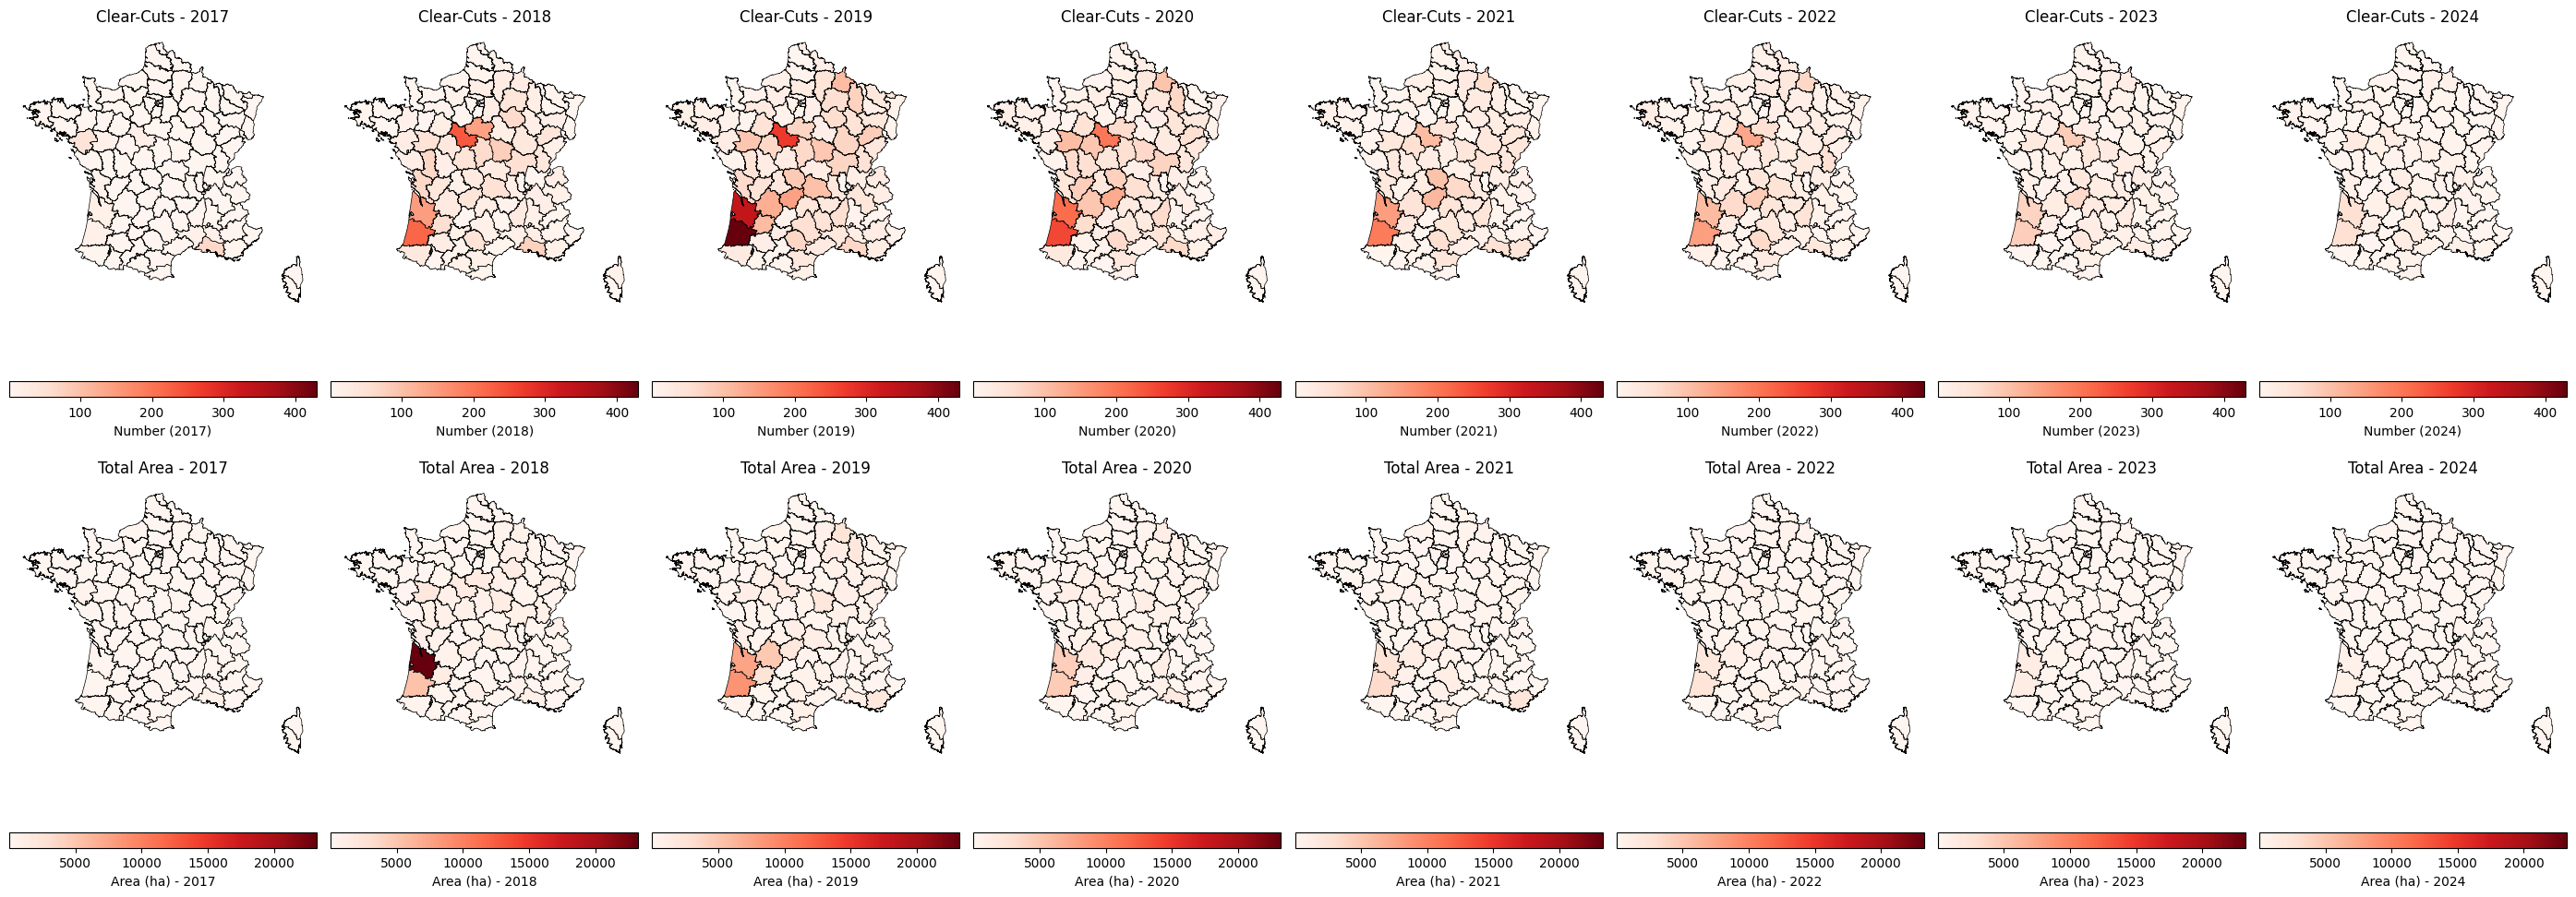

In [133]:
years = [str(y) for y in range(2017, 2025)]

# vmax and vmin to have same scale
vmin_total = map_dpt[[f"total_{year}" for year in years]].min().min()
vmax_total = map_dpt[[f"total_{year}" for year in years]].max().max()

vmin_area = map_dpt[[f"sum_area_ha_{year}" for year in years]].min().min()
vmax_area = map_dpt[[f"sum_area_ha_{year}" for year in years]].max().max()

fig, axes = plt.subplots(2, len(years), figsize=(28, 10))

for i, year in enumerate(years):
    col_total = f"total_{year}"
    map_dpt[col_total] = map_dpt[col_total].fillna(0)

    map_dpt.plot(
        column=col_total,
        cmap="Reds",
        linewidth=0.5,
        edgecolor="black",
        legend=True,
        legend_kwds={"label": f"Number ({year})", "orientation": "horizontal"},
        vmin=vmin_total,
        vmax=vmax_total,  # scale
        ax=axes[0, i],
    )

    axes[0, i].set_title(f"Clear-Cuts - {year}")
    axes[0, i].axis("off")

    col_area = f"sum_area_ha_{year}"
    map_dpt[col_area] = map_dpt[col_area].fillna(0)

    map_dpt.plot(
        column=col_area,
        cmap="Reds",
        linewidth=0.5,
        edgecolor="black",
        legend=True,
        legend_kwds={"label": f"Area (ha) - {year}", "orientation": "horizontal"},
        vmin=vmin_area,
        vmax=vmax_area,
        ax=axes[1, i],
    )

    axes[1, i].set_title(f"Total Area - {year}")
    axes[1, i].axis("off")

plt.tight_layout()

# saving plot
file_path = os.path.join(
    output_dir, "maps_per_year_nb_and_area_clear_cuts_2017_2024.png"
)
plt.savefig(file_path, dpi=300)
plt.show()

In [ ]:
# saving all dataframes into excel sheets
with pd.ExcelWriter(excel_file_general_stat, engine="openpyxl") as writer:
    general_stats.to_excel(writer, sheet_name="general_statistics", index=True)
    stats_years.to_excel(writer, sheet_name="general_statistics_per_year", index=False)
    clear_cuts_type_years.to_excel(
        writer, sheet_name="clear_cuts_type_per_year", index=True
    )
    regions_clear_cuts_count.to_excel(
        writer, sheet_name="statistics_regions", index=True
    )
    dpt_clear_cuts_count.to_excel(writer, sheet_name="statistics_dpt", index=True)